In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from import_many_files import import_many_files
files, df_arr = import_many_files('csv', dir='/Users/Sebastian/Sales_data/SalesAnalysis/Sales_Data'), []
for file in files:
    df_arr.append(pd.read_csv(f'Sales_Data/{file}'))
df = pd.concat(df_arr)

[]


In [3]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Drop Nan Values in Rows

In [4]:
df = df.dropna(how='any')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


# Convert values to float

In [5]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors='coerce')
df['Price Each'] = pd.to_numeric(df['Price Each'],errors='coerce')

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20920\3329098372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],errors='coerce')
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20920\3329098372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'],errors='coerce')


# Create column with sales

In [6]:
df = df.assign(sales=df['Quantity Ordered']*df['Price Each'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


# Set Column with month

In [7]:
df = df.assign(month=pd.DatetimeIndex(pd.to_datetime(df['Order Date'], errors='coerce')).month)
df.head(40)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0
6,176562,USB-C Charging Cable,1.0,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",11.95,4.0
7,176563,Bose SoundSport Headphones,1.0,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",99.99,4.0
8,176564,USB-C Charging Cable,1.0,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",11.95,4.0
9,176565,Macbook Pro Laptop,1.0,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",1700.00,4.0
10,176566,Wired Headphones,1.0,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",11.99,4.0


# Dates array

In [8]:
dates = ['','January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create city column

In [9]:
df = df.assign(city=df['Purchase Address'].apply(lambda x: x.split(',')[1:-1]))
df['city'] = df['city'].apply(lambda x: str(x).strip('[]').strip("''"))
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0,Dallas
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0,Boston
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,Los Angeles
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,Los Angeles
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0,Los Angeles
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0,Los Angeles
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0,San Francisco
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0,San Francisco
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0,San Francisco


# Create hours and min columns

In [10]:
df = df.assign(hours=pd.DatetimeIndex(pd.to_datetime(df['Order Date'], errors='coerce')).hour, minutes=pd.DatetimeIndex(pd.to_datetime(df['Order Date'], errors='coerce')).minute)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city,hours,minutes
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4.0,Dallas,8.0,46.0
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4.0,Boston,22.0,30.0
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,Los Angeles,14.0,38.0
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,Los Angeles,14.0,38.0
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4.0,Los Angeles,9.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9.0,Los Angeles,20.0,56.0
11682,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9.0,San Francisco,16.0,0.0
11683,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9.0,San Francisco,7.0,39.0
11684,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9.0,San Francisco,17.0,30.0


# Answer Questions
## Question 1
* What was the best month for sales? How much was earned that month?

In [11]:
df_month_sales = df.groupby('month')['sales'].sum().to_frame()
df_month_sales

,sales
month,
1.0,1822256.73
2.0,2202022.42
3.0,2807100.38
4.0,3390670.24
5.0,3152606.75
6.0,2577802.26
7.0,2647775.76
8.0,2244467.88
9.0,2097560.13


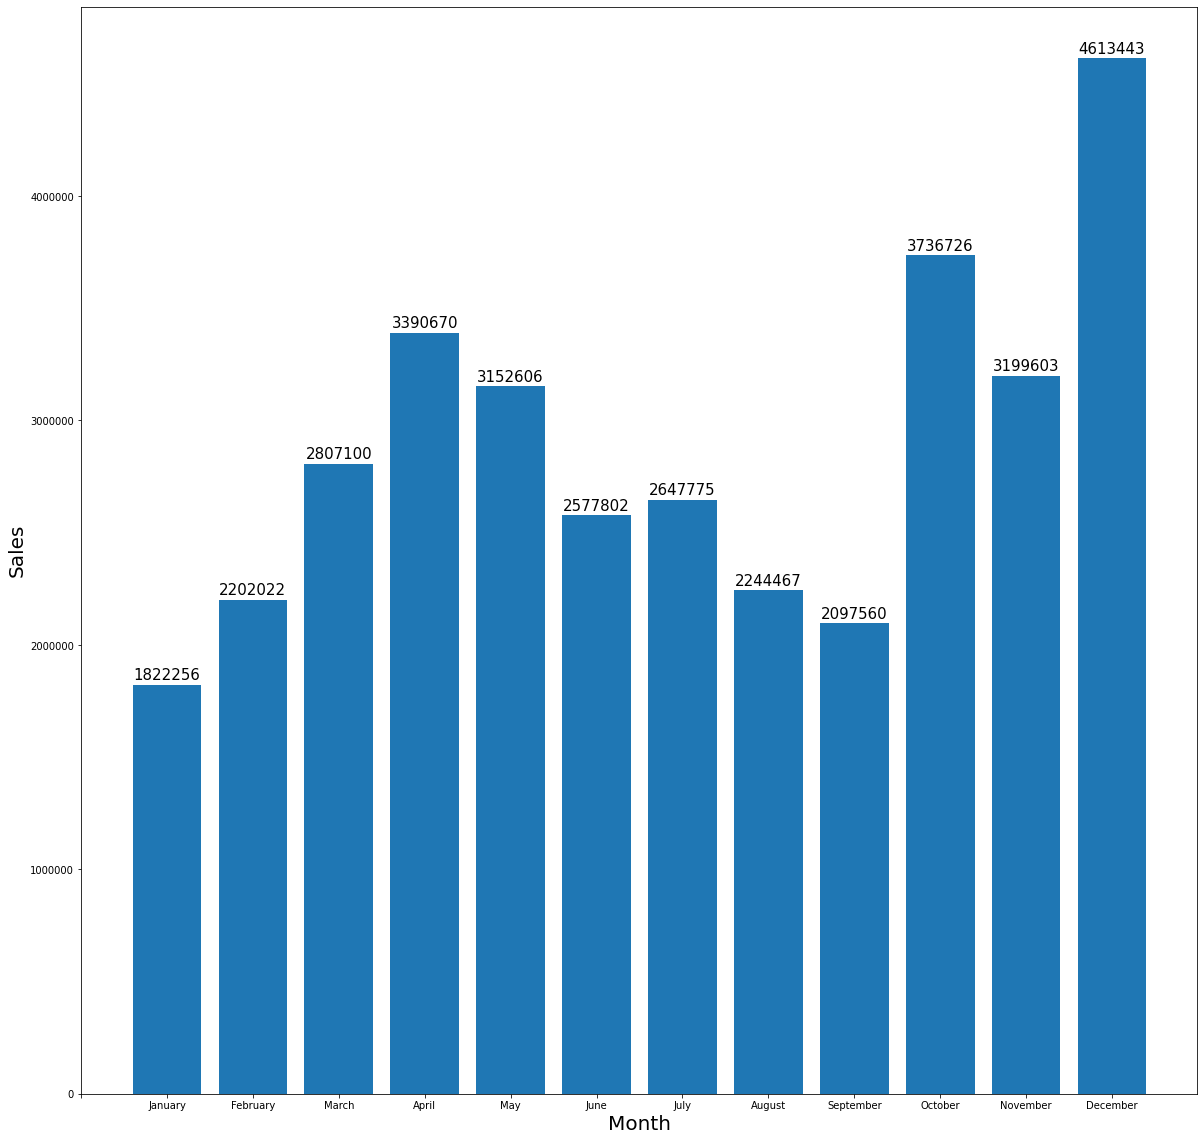

In [12]:
fig,ax = plt.subplots(figsize=(20,20))
ax.bar(df_month_sales.index, df_month_sales['sales'])
ax.set_xticks(ticks=np.arange(13),labels=dates)
ax.bar_label(ax.containers[0], padding=2, fmt = '%d', size = 15)
ax.set_xlabel('Month', fontsize=20)
ax.set_ylabel('Sales', fontsize=20)
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

# Question 2
* What city sold the most product?

In [13]:
df_most_city_sold = df.groupby('city')['sales'].sum().to_frame()
df_most_city_sold = df_most_city_sold.drop(df_most_city_sold.index[0])
df_most_city_sold

,sales
city,
Atlanta,2795498.58
Austin,1819581.75
Boston,3661642.01
Dallas,2767975.40
Los Angeles,5452570.80
New York City,4664317.43
Portland,2320490.61
San Francisco,8262203.91
Seattle,2747755.48


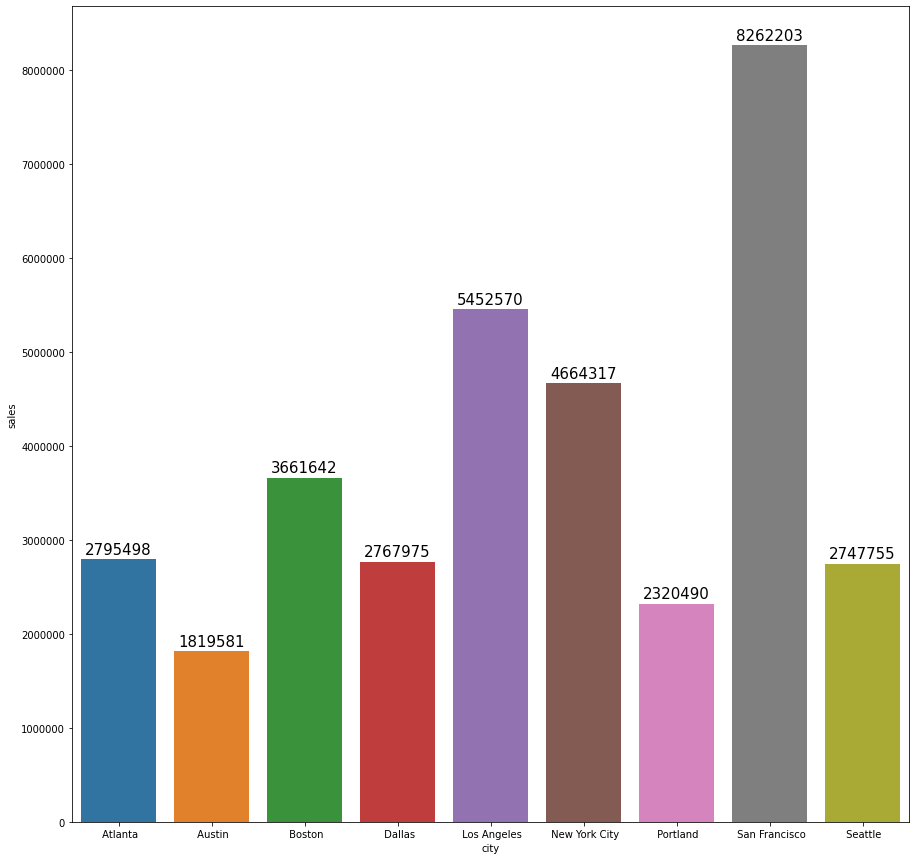

In [14]:
fig,ax = plt.subplots(figsize=(15,15))
sns.barplot(x=df_most_city_sold.index, y=df_most_city_sold['sales'])
ax.bar_label(ax.containers[0], padding=2, fmt = '%d', size = 15)
plt.ticklabel_format(style = 'plain', axis='y')
plt.show()

# Question 3
* What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [15]:
df_display_advertisemens = df.groupby('hours')['sales'].sum().to_frame()
df_display_advertisemens

,sales
hours,
0.0,713721.27
1.0,460866.88
2.0,234851.44
3.0,145757.89
4.0,162661.01
5.0,230679.82
6.0,448113.00
7.0,744854.12
8.0,1192348.97


# Type 1

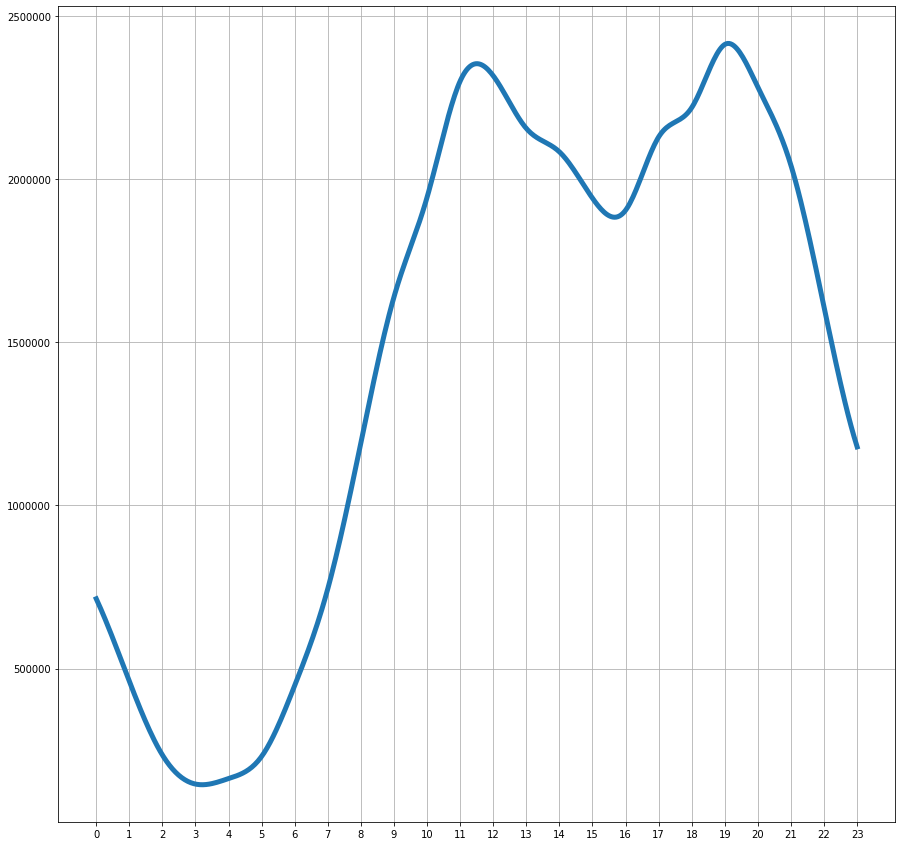

In [16]:
from scipy.interpolate import interp1d
x,y = df_display_advertisemens.index, df_display_advertisemens['sales']
cubic_interploation_model = interp1d(x, y, kind = "cubic")
X_=np.linspace(x.min(), x.max(), 500)
Y_=cubic_interploation_model(X_)

fig,ax = plt.subplots(figsize=(15,15))
ax.plot(X_, Y_, linewidth=5)
ax.set_xticks(ticks=np.arange(24), labels=np.arange(24))
plt.ticklabel_format(style = 'plain', axis='y')
plt.grid()
plt.show()

# Type 2

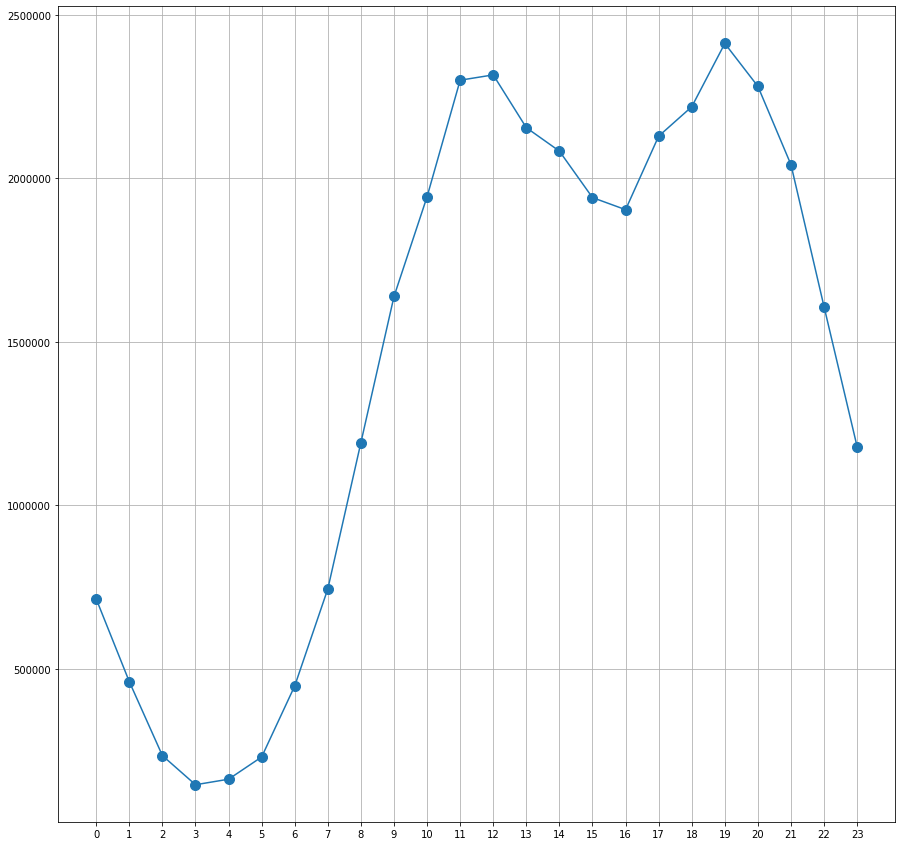

In [17]:
x,y = df_display_advertisemens.index, df_display_advertisemens['sales']
fig,ax = plt.subplots(figsize=(15,15))
ax.plot(x, y, marker='.', markersize=20)
ax.set_xticks(ticks=np.arange(24), labels=np.arange(24))
plt.ticklabel_format(style = 'plain', axis='y')
plt.grid()
plt.show()

# Question 4
* What products are most often sold together?

In [18]:
df_together = df[df['Order ID'].duplicated(keep=False)]
df_together['Product'] = df_together['Product'].apply(lambda x: f',{x}')
df_together

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_20920\858706434.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_together['Product'] = df_together['Product'].apply(lambda x: f',{x}')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,sales,month,city,hours,minutes
3,176560,",Google Phone",1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4.0,Los Angeles,14.0,38.0
4,176560,",Wired Headphones",1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4.0,Los Angeles,14.0,38.0
18,176574,",Google Phone",1.0,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",600.00,4.0,Los Angeles,19.0,42.0
19,176574,",USB-C Charging Cable",1.0,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",11.95,4.0,Los Angeles,19.0,42.0
30,176585,",Bose SoundSport Headphones",1.0,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",99.99,4.0,Boston,11.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...
11628,259303,",AA Batteries (4-pack)",1.0,3.84,09/20/19 20:18,"106 7th St, Atlanta, GA 30301",3.84,9.0,Atlanta,20.0,18.0
11639,259314,",Wired Headphones",1.0,11.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",11.99,9.0,Atlanta,0.0,25.0
11640,259314,",AAA Batteries (4-pack)",2.0,2.99,09/16/19 00:25,"241 Highland St, Atlanta, GA 30301",5.98,9.0,Atlanta,0.0,25.0
11677,259350,",Google Phone",1.0,600.00,09/30/19 13:49,"519 Maple St, San Francisco, CA 94016",600.00,9.0,San Francisco,13.0,49.0


In [19]:
df_together = df_together.assign(together=df_together.groupby('Order ID', as_index=False)['Product'].sum()['Product'])
df_together = df_together.dropna()
df_together['together'] = df_together['together'].apply(lambda x: x.split(',')[1:])

In [20]:
df_together['together'] = df_together['together'].apply(lambda x: None if len(x) > 2 and x[0] != x[1] else ' with '.join(x))
df_together = df_together.groupby('together')['Quantity Ordered'].sum().to_frame().sort_values(by='Quantity Ordered', ascending=False)
df_together = df_together.head(10)
df_together

,Quantity Ordered
together,
Google Phone with USB-C Charging Cable,951.0
iPhone with Lightning Charging Cable,928.0
iPhone with Wired Headphones,363.0
Vareebadd Phone with USB-C Charging Cable,337.0
Google Phone with Wired Headphones,286.0
iPhone with Apple Airpods Headphones,270.0
Google Phone with Bose SoundSport Headphones,151.0
Vareebadd Phone with Wired Headphones,129.0
Vareebadd Phone with Bose SoundSport Headphones,67.0


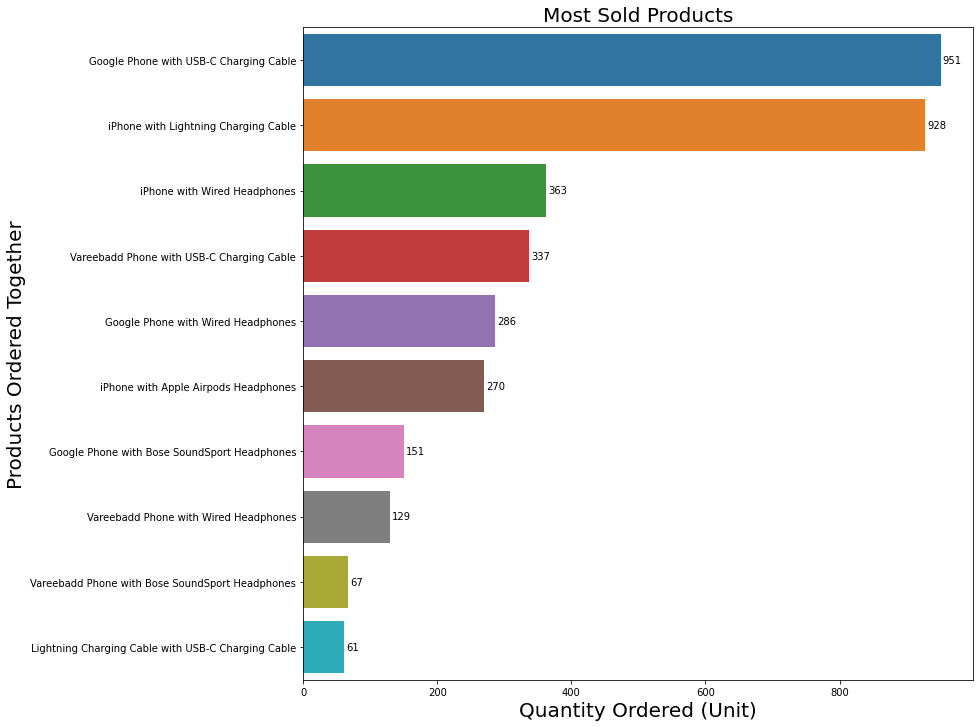

In [21]:
fig,ax = plt.subplots(figsize=(12,12))
sns.barplot(x=df_together['Quantity Ordered'], y=df_together.index)
ax.set_xlabel('Quantity Ordered (Unit)', fontsize=20)
ax.set_ylabel('Products Ordered Together', fontsize=20)
ax.set_title('Most Sold Products', fontsize=20)
ax.bar_label(ax.containers[0], padding=2, fmt = '%d', size = 10)
plt.show()

# Question 5
* What product sold the most? Why do you think it sold the most?

In [22]:
df_sold_most = df
df_sold_most['Quantity Ordered'] = df_sold_most['Quantity Ordered'].apply(lambda x: 1 if x>=1 else None)
df_sold_most = df_sold_most.groupby('Product')['Quantity Ordered'].sum().to_frame().sort_values(by='Quantity Ordered',ascending=False)
df_sold_most = df_sold_most.drop(df_sold_most.index[-1])
df_sold_most

,Quantity Ordered
Product,
USB-C Charging Cable,21903.0
Lightning Charging Cable,21658.0
AAA Batteries (4-pack),20641.0
AA Batteries (4-pack),20577.0
Wired Headphones,18882.0
Apple Airpods Headphones,15549.0
Bose SoundSport Headphones,13325.0
27in FHD Monitor,7507.0
iPhone,6842.0


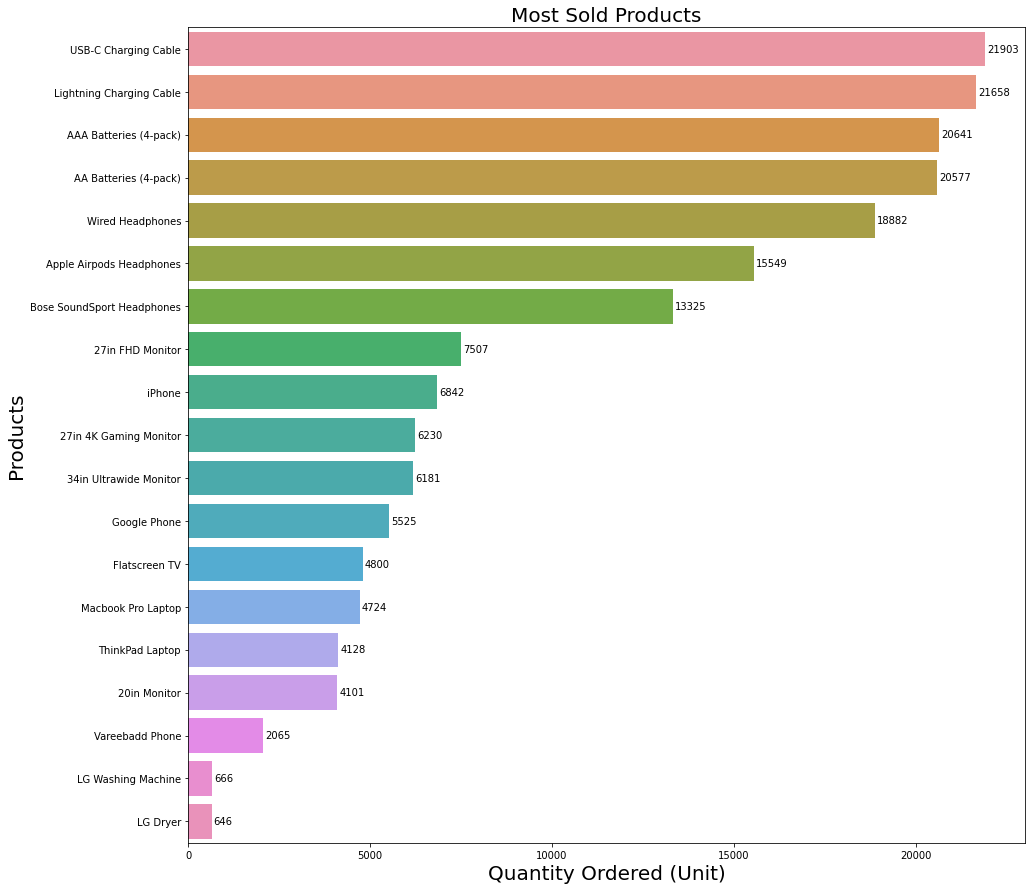

In [23]:
fig,ax = plt.subplots(figsize=(15,15))
sns.barplot(x=df_sold_most['Quantity Ordered'], y=df_sold_most.index)
ax.set_xlabel('Quantity Ordered (Unit)', fontsize=20)
ax.set_ylabel('Products', fontsize=20)
ax.set_title('Most Sold Products', fontsize=20)
ax.bar_label(ax.containers[0], padding=2, fmt = '%d', size = 10)
plt.show()

# Price-to-sales analysis

In [28]:
df_product_sales = df
df_product_sales['Quantity Ordered'] = df_product_sales['Quantity Ordered'].apply(lambda x: 1 if x>=1 else None)
df_product_sales = df_product_sales.groupby('Product')['Quantity Ordered'].sum().to_frame().sort_values(by='Product',ascending=True)
df_product_sales['Quantity Ordered'] = df_product_sales['Quantity Ordered'].apply(lambda x: None if x==0 else x)
df_product_sales = df_product_sales.dropna()
df_product_sales

,Quantity Ordered
Product,
20in Monitor,4101.0
27in 4K Gaming Monitor,6230.0
27in FHD Monitor,7507.0
34in Ultrawide Monitor,6181.0
AA Batteries (4-pack),20577.0
AAA Batteries (4-pack),20641.0
Apple Airpods Headphones,15549.0
Bose SoundSport Headphones,13325.0
Flatscreen TV,4800.0


In [29]:
df_products = df.groupby('Product')['Price Each'].mean().to_frame().sort_values(by='Product', ascending=True).dropna()
df_products = df_products.drop(df_products.index[-1])
df_products

,Price Each
Product,
20in Monitor,109.99
27in 4K Gaming Monitor,389.99
27in FHD Monitor,149.99
34in Ultrawide Monitor,379.99
AA Batteries (4-pack),3.84
AAA Batteries (4-pack),2.99
Apple Airpods Headphones,150.00
Bose SoundSport Headphones,99.99
Flatscreen TV,300.00


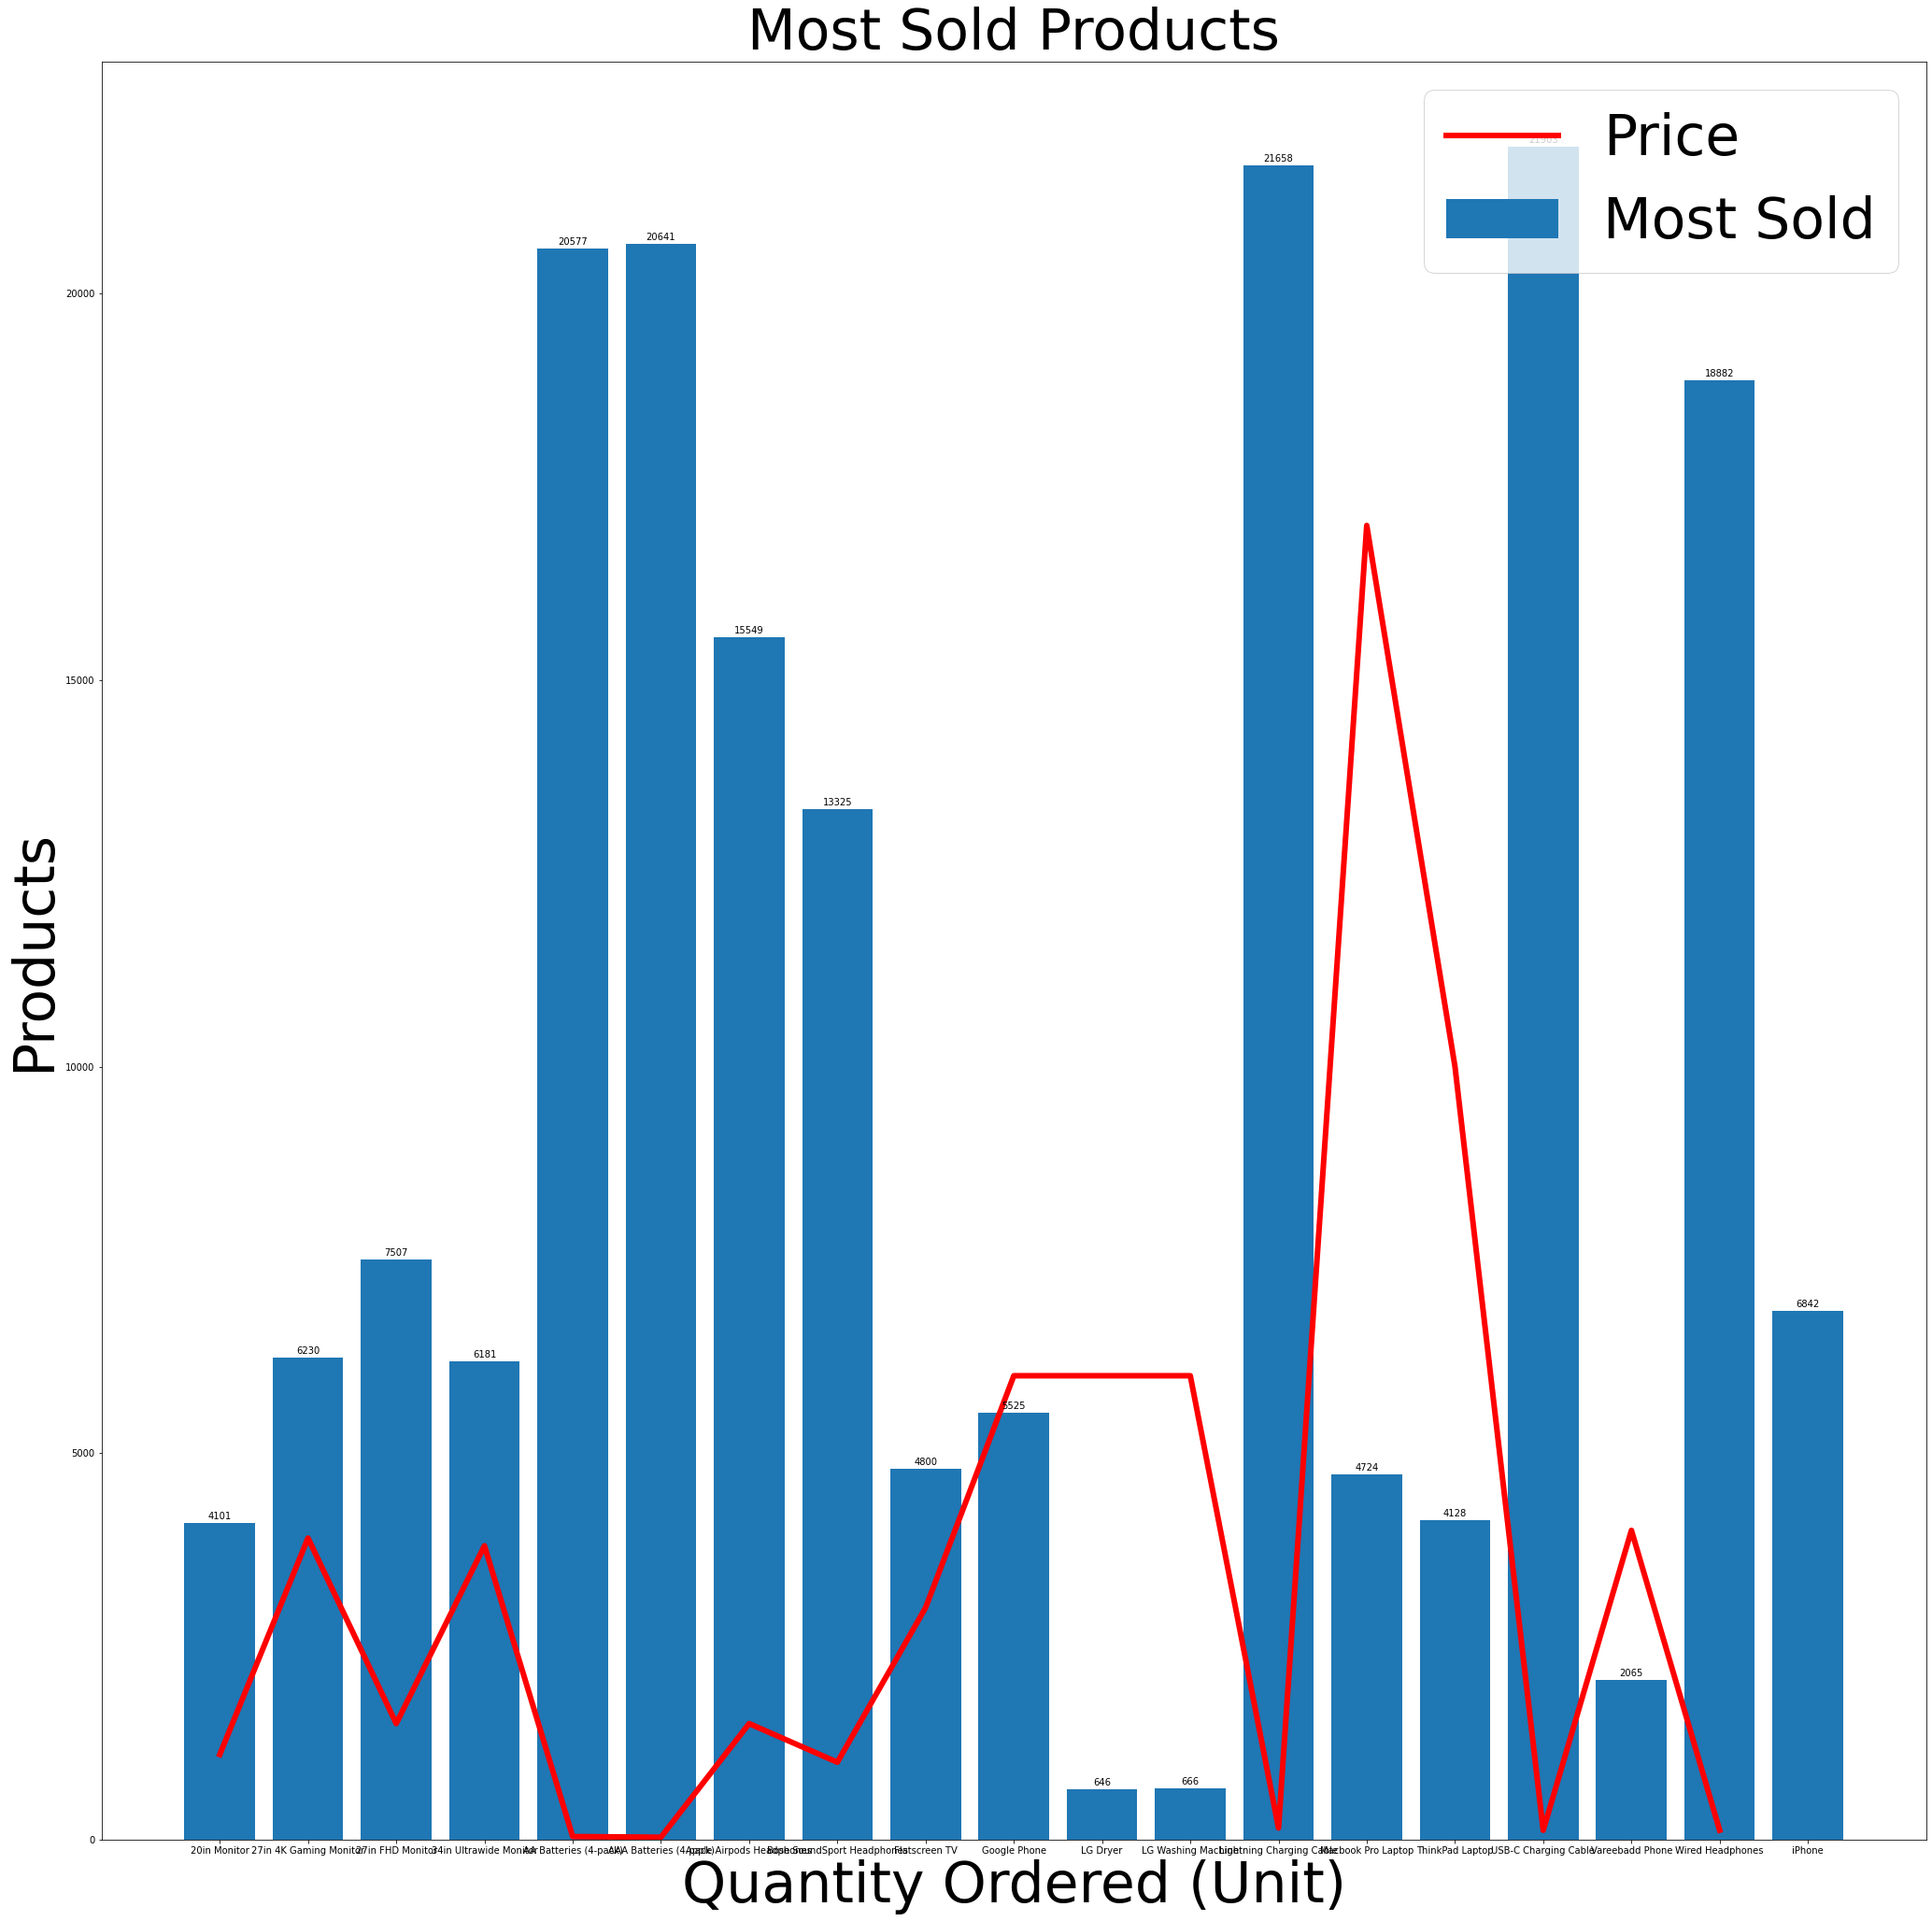

In [44]:
fig,ax = plt.subplots(figsize=(35,35))
ax.bar(x=df_product_sales.index, height=df_product_sales['Quantity Ordered'], label='Most Sold')
ax.plot(df_products.index, df_products['Price Each']*10, color='red', linewidth=6, label='Price')
ax.set_xlabel('Quantity Ordered (Unit)', fontsize=60)
ax.set_ylabel('Products', fontsize=60)
ax.set_title('Most Sold Products', fontsize=60)
ax.bar_label(ax.containers[0], padding=2, fmt = '%d', size = 10)
plt.legend(fontsize=60)
plt.show()